In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency


In [3]:
import xgboost as xgb


In [4]:
df1 = pd.read_csv('train (1).csv')
df2 = pd.read_csv('test(1).csv')


In [5]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df2.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
df1.shape

(8693, 14)

In [9]:
df1['Name'].nunique()

8473

In [10]:
contingency = pd.crosstab(df1['Destination'], df1['Transported'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"P-value: {p}")

P-value: 7.892901466137099e-24


In [11]:
df1.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
df1 = df1.drop(['Name'], axis=1)

In [13]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [14]:
for i in ['HomePlanet', 'CryoSleep', 'Destination']:
    print(i)
    print(df1[i].value_counts(dropna=False))  # Include NaN in counts
    print(" ")

HomePlanet
HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64
 
CryoSleep
CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64
 
Destination
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64
 


# Handling Missing Values

In [16]:
# Fill categorical columns with mode
df1['HomePlanet'].fillna(df1['HomePlanet'].mode()[0], inplace=True)
df1['CryoSleep'].fillna(False, inplace=True)  # Assuming missing means not in cryosleep
df1['Destination'].fillna(df1['Destination'].mode()[0], inplace=True)
df1['VIP'].fillna(False, inplace=True)  # Assuming missing means not a VIP

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_22768\798649349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['HomePlanet'].fillna(df1['HomePlanet'].mode()[0], inplace=True)
C:\Users\VISHAL\AppData\Local\Temp\ipykernel_22768\798649349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [17]:
df1.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [18]:
df1[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isnull().any(axis=1).sum()

1073

In [19]:
df1.dropna(inplace=True)

In [20]:
df1.shape

(7441, 13)

In [21]:
# Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
df1[['Deck', 'Num', 'Side']] = df1['Cabin'].str.split('/', expand=True)

# Convert 'Num' to numeric for further processing
df1['Num'] = pd.to_numeric(df1['Num'], errors='coerce')


In [22]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [23]:
for i in ["Deck","Num","Side"]:
    print(df1[i].value_counts(dropna=False))  # Include NaN in counts
    print(" ")

Deck
F    2447
G    2219
E     777
B     695
C     654
D     415
A     230
T       4
Name: count, dtype: int64
 
Num
82      22
19      21
97      21
56      20
176     20
        ..
1207     1
1543     1
1211     1
1540     1
1447     1
Name: count, Length: 1777, dtype: int64
 
Side
S    3770
P    3671
Name: count, dtype: int64
 


In [24]:
#Splitting the PassenderId
df1[['GroupId', 'PassengerNum']] = df1['PassengerId'].str.split('_', expand=True)

# Convert the new columns to integer type for numerical analysis
df1['GroupId'] = df1['GroupId'].astype(int)
df1['PassengerNum'] = df1['PassengerNum'].astype(int)

In [25]:
df1=df1.drop(['PassengerId','Cabin','GroupId'],axis=1)

In [26]:
df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,PassengerNum
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1


In [27]:
df1 = pd.get_dummies(df1, columns=['HomePlanet', 'Destination','Deck','Side'], drop_first=True)


In [28]:
df1.shape

(7441, 23)

In [29]:
df1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,PassengerNum
count,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000,7441.000000
mean,28.889665,224.073646,472.297541,175.181830,312.626394,301.040989,601.968956,1.518613
std,14.506480,647.970462,1652.026891,616.276688,1136.403973,1114.108811,513.590045,1.054921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,428.000000,1.000000
75%,38.000000,51.000000,82.000000,28.000000,64.000000,49.000000,1000.000000,2.000000
max,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,20336.000000,1894.000000,8.000000


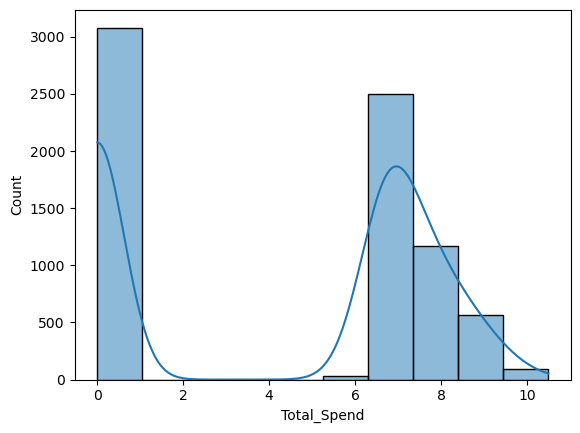

In [30]:
# Create Total_Spend column
df1['Total_Spend'] = df1[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df1['Total_Spend'] = np.log1p(df1['Total_Spend'])
# Plot histogram with KDE
sns.histplot(df1['Total_Spend'], kde=True, bins=10)

# Show plot
plt.show()

In [31]:
df1=df1.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],axis =1)

In [32]:
df1.shape

(7441, 19)

# Splitting and train_test_split

In [34]:
X= df1.drop('Transported',axis=1)
Y= df1['Transported'].astype(int)
X[['CryoSleep', 'VIP']] = df1[['CryoSleep', 'VIP']].astype(int)

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40,stratify=Y)


# Scaling

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [39]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

In [40]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Test accuracy:", accuracy)
print("Classification Report:\n", classification_report(Y_test,Y_pred))

Test accuracy: 0.7313633310946944
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.75       741
           1       0.77      0.67      0.71       748

    accuracy                           0.73      1489
   macro avg       0.74      0.73      0.73      1489
weighted avg       0.74      0.73      0.73      1489



In [82]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [84]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [86]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions on the test set
    Y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print("="*50)

Model: Logistic Regression
Accuracy: 0.7314
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.75       741
           1       0.77      0.67      0.71       748

    accuracy                           0.73      1489
   macro avg       0.74      0.73      0.73      1489
weighted avg       0.74      0.73      0.73      1489

Model: Random Forest
Accuracy: 0.7589
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       741
           1       0.81      0.68      0.74       748

    accuracy                           0.76      1489
   macro avg       0.77      0.76      0.76      1489
weighted avg       0.77      0.76      0.76      1489

Model: SVM
Accuracy: 0.7508
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       741
           1       0.80      0.67      0.73       748

   

C:\Users\VISHAL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
